In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
from sklearn.tree import DecisionTreeClassifier, plot_tree

from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier

In [3]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

In [4]:
from collections import Counter

In [5]:
data = pd.read_csv('../dataset/heart.csv')

In [6]:
data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [7]:
y=data['target']
X=data.drop(['target'], axis=1)

In [8]:
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.15, 
                                                    random_state=666, 
                                                    stratify=y)

In [9]:
dtree= DecisionTreeClassifier()
rand_forest = RandomForestClassifier(n_jobs=-1)
ada_boost = AdaBoostClassifier()

In [10]:
%%time
dtree.fit(X_train,y_train)

CPU times: total: 15.6 ms
Wall time: 5.14 ms


DecisionTreeClassifier()

In [11]:
%%time
rand_forest.fit(X_train,y_train)

CPU times: total: 484 ms
Wall time: 461 ms


RandomForestClassifier(n_jobs=-1)

In [12]:
%%time
ada_boost.fit(X_train,y_train)

CPU times: total: 172 ms
Wall time: 182 ms


AdaBoostClassifier()

In [13]:
features = list(X_train.columns)

In [14]:
features

['age',
 'sex',
 'cp',
 'trestbps',
 'chol',
 'fbs',
 'restecg',
 'thalach',
 'exang',
 'oldpeak',
 'slope',
 'ca',
 'thal']

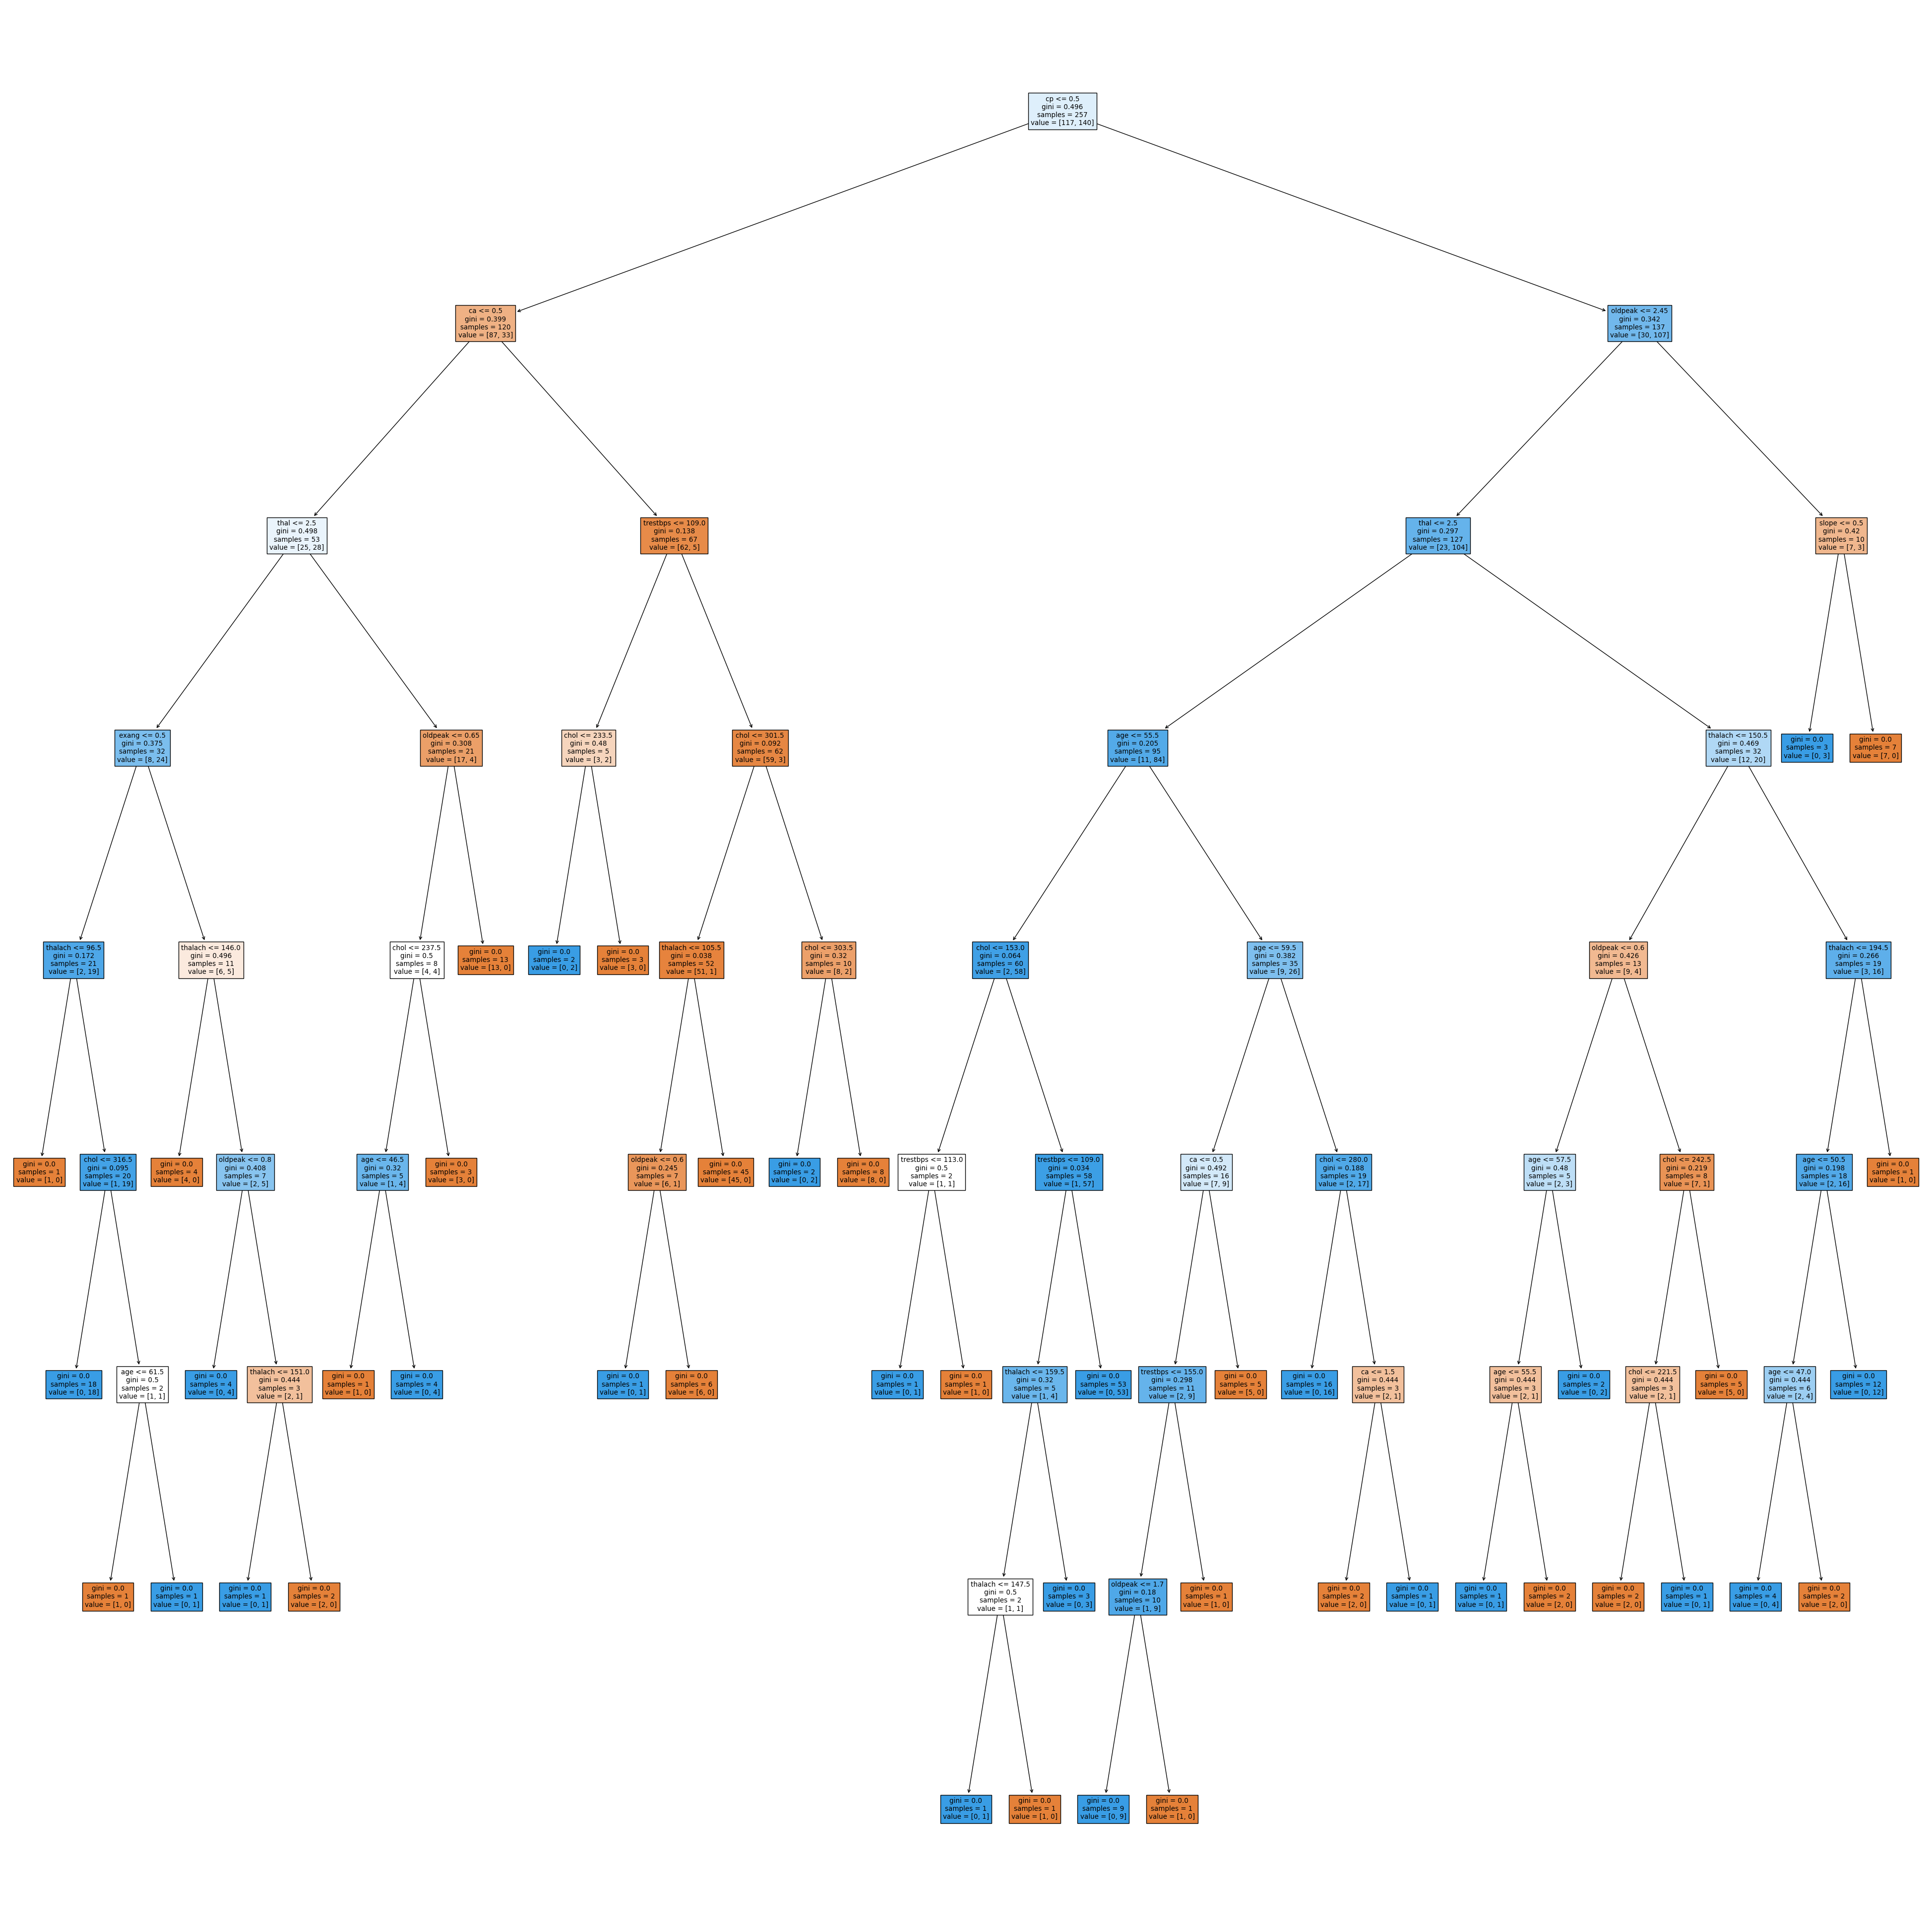

In [15]:
plt.figure(figsize=(50,50))
plot_tree(dtree, feature_names=features, filled=True)
plt.show()

In [16]:
features_imp_dtree= dtree.feature_importances_
features_imp_dtree

array([0.09953316, 0.        , 0.2569961 , 0.03124086, 0.1125348 ,
       0.        , 0.        , 0.10514579, 0.02295747, 0.10900354,
       0.03294872, 0.14212493, 0.08751465])

In [17]:
features

['age',
 'sex',
 'cp',
 'trestbps',
 'chol',
 'fbs',
 'restecg',
 'thalach',
 'exang',
 'oldpeak',
 'slope',
 'ca',
 'thal']

In [18]:
for imp,feat in zip(features_imp_dtree,features):
    print(f'{feat}:{imp*100}%')

age:9.953315893008877%
sex:0.0%
cp:25.699610304537295%
trestbps:3.1240863814868147%
chol:11.253479613782666%
fbs:0.0%
restecg:0.0%
thalach:10.514578556703102%
exang:2.2957465814608677%
oldpeak:10.900353584169336%
slope:3.2948717948717956%
ca:14.21249254294524%
thal:8.751464747034008%


In [19]:
y_pred_dtree= dtree.predict(X_test)
print(classification_report(y_test, y_pred_dtree))

              precision    recall  f1-score   support

           0       0.79      0.90      0.84        21
           1       0.91      0.80      0.85        25

    accuracy                           0.85        46
   macro avg       0.85      0.85      0.85        46
weighted avg       0.86      0.85      0.85        46



In [20]:
features_imp_rand_forest = rand_forest.feature_importances_
for imp,feat in zip(features_imp_rand_forest,features):
    print(f'{feat}:{round(imp*100,2)}%')

age:8.9%
sex:3.4%
cp:14.13%
trestbps:6.43%
chol:7.83%
fbs:1.09%
restecg:2.33%
thalach:12.21%
exang:6.21%
oldpeak:10.75%
slope:4.13%
ca:12.4%
thal:10.2%


In [21]:
y_pred_rand_forest= rand_forest.predict(X_test)
print(classification_report(y_test, y_pred_rand_forest))

              precision    recall  f1-score   support

           0       0.95      0.90      0.93        21
           1       0.92      0.96      0.94        25

    accuracy                           0.93        46
   macro avg       0.94      0.93      0.93        46
weighted avg       0.94      0.93      0.93        46



In [22]:
features_imp_ada_boost= ada_boost.feature_importances_
for imp,feat in zip(features_imp_ada_boost,features):
    print(f'{feat}:{round(imp*100,2)}%')

age:22.0%
sex:6.0%
cp:4.0%
trestbps:8.0%
chol:12.0%
fbs:0.0%
restecg:2.0%
thalach:18.0%
exang:2.0%
oldpeak:12.0%
slope:4.0%
ca:4.0%
thal:6.0%


In [23]:
y_pred_ada_boost= ada_boost.predict(X_test)
print(classification_report(y_test, y_pred_ada_boost))

              precision    recall  f1-score   support

           0       0.87      0.95      0.91        21
           1       0.96      0.88      0.92        25

    accuracy                           0.91        46
   macro avg       0.91      0.92      0.91        46
weighted avg       0.92      0.91      0.91        46



In [24]:
from sklearn.linear_model import LogisticRegression

In [29]:
logic= LogisticRegression(max_iter=1000)


In [30]:
logic.fit(X_train,y_train)

LogisticRegression(max_iter=1000)

In [31]:
y_pred_logic=logic.predict(X_test)
print(classification_report(y_test, y_pred_logic))

              precision    recall  f1-score   support

           0       0.94      0.71      0.81        21
           1       0.80      0.96      0.87        25

    accuracy                           0.85        46
   macro avg       0.87      0.84      0.84        46
weighted avg       0.86      0.85      0.84        46



In [32]:
y_pred_proba=rand_forest.predict_proba(X_test)

In [33]:
y_pred_proba[0:5]

array([[0.04, 0.96],
       [0.23, 0.77],
       [1.  , 0.  ],
       [0.13, 0.87],
       [0.91, 0.09]])

In [34]:
y_pred_rand_forest[0:5]

array([1, 1, 0, 1, 0], dtype=int64)